<a href="https://www.kaggle.com/code/vijays140291/hotel-type-prediction?scriptVersionId=139404831" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix,classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [2]:
#loading the dataset
df=pd.read_csv('/kaggle/input/hotel-booking-demand/hotel_bookings.csv')
#showing the dataset
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [5]:
#dropping the company column
df=df.drop('company',axis=1)

In [6]:
for column in ['children','agent']:
    df[column]=df[column].fillna(df[column].mean())

In [7]:
#filling country column which is object
df['country']=df['country'].fillna(df['country'].mode()[0])

In [8]:
df.isna().sum().sum()

0

In [9]:
{column:len(list(df[column].unique())) for column in df.columns if df[column].dtypes=='object'}

{'hotel': 2,
 'arrival_date_month': 12,
 'meal': 5,
 'country': 177,
 'market_segment': 8,
 'distribution_channel': 5,
 'reserved_room_type': 10,
 'assigned_room_type': 12,
 'deposit_type': 3,
 'customer_type': 4,
 'reservation_status': 3,
 'reservation_status_date': 926}

In [10]:
df=df.drop('arrival_date_month',axis=1)

In [11]:
{column:list(df[column].unique()) for column in df.columns if df[column].dtypes=='object'}

{'hotel': ['Resort Hotel', 'City Hotel'],
 'meal': ['BB', 'FB', 'HB', 'SC', 'Undefined'],
 'country': ['PRT',
  'GBR',
  'USA',
  'ESP',
  'IRL',
  'FRA',
  'ROU',
  'NOR',
  'OMN',
  'ARG',
  'POL',
  'DEU',
  'BEL',
  'CHE',
  'CN',
  'GRC',
  'ITA',
  'NLD',
  'DNK',
  'RUS',
  'SWE',
  'AUS',
  'EST',
  'CZE',
  'BRA',
  'FIN',
  'MOZ',
  'BWA',
  'LUX',
  'SVN',
  'ALB',
  'IND',
  'CHN',
  'MEX',
  'MAR',
  'UKR',
  'SMR',
  'LVA',
  'PRI',
  'SRB',
  'CHL',
  'AUT',
  'BLR',
  'LTU',
  'TUR',
  'ZAF',
  'AGO',
  'ISR',
  'CYM',
  'ZMB',
  'CPV',
  'ZWE',
  'DZA',
  'KOR',
  'CRI',
  'HUN',
  'ARE',
  'TUN',
  'JAM',
  'HRV',
  'HKG',
  'IRN',
  'GEO',
  'AND',
  'GIB',
  'URY',
  'JEY',
  'CAF',
  'CYP',
  'COL',
  'GGY',
  'KWT',
  'NGA',
  'MDV',
  'VEN',
  'SVK',
  'FJI',
  'KAZ',
  'PAK',
  'IDN',
  'LBN',
  'PHL',
  'SEN',
  'SYC',
  'AZE',
  'BHR',
  'NZL',
  'THA',
  'DOM',
  'MKD',
  'MYS',
  'ARM',
  'JPN',
  'LKA',
  'CUB',
  'CMR',
  'BIH',
  'MUS',
  'COM',
  'SUR',


In [12]:
df['reservation_month']=pd.to_datetime(df['reservation_status_date']).dt.month
df['reservation_day']=pd.to_datetime(df['reservation_status_date']).dt.day
df['reservation_year']=pd.to_datetime(df['reservation_status_date']).dt.year
df=df.drop('reservation_status_date',axis=1)

In [13]:
#dropping highly correlated columns
df=df.drop(['reservation_year','arrival_date_week_number'],axis=1)

In [14]:
onehot_columns=[column for column in df.columns if df[column].dtypes=='object']

In [15]:
onehot_columns

['hotel',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'customer_type',
 'reservation_status']

In [16]:
#onehot_encode
def onehot_encode(df,column):
    df=df.copy()
    dummies=pd.get_dummies(df[column],prefix=column)
    df=pd.concat([df,dummies],axis=1)
    df=df.drop(column,axis=1)
    return df

In [17]:
for column in onehot_columns[1:]:
    df=onehot_encode(df,column)

In [18]:
df['hotel']=df['hotel'].apply(lambda x:1 if x=='Resort Hotel' else 0)

In [19]:
df['hotel'].value_counts()

0    79330
1    40060
Name: hotel, dtype: int64

In [20]:
#splitting and scalling
y=df['hotel']
x=df.drop('hotel',axis=1)
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=212)
scaler=StandardScaler()
scaler.fit(x_train)
x_train=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [21]:
print(x_train.shape)
print(y_train.shape)
print(y_test.shape)
print(x_test.shape)

(83573, 247)
(83573,)
(35817,)
(35817, 247)


In [22]:
x_train.shape

(83573, 247)

In [23]:
#trainig the model
inputs=tf.keras.Input(shape=(247,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(inputs,outputs)

In [24]:
model.compile(optimizer='adam',loss='binary_crossentropy',
             metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])
batch_size=32
epochs=100
history=model.fit(x_train,y_train,validation_split=0.2,batch_size=batch_size,epochs=epochs)

Epoch 1/100
2090/2090 [==============================] - 7s 3ms/step - loss: 0.1690 - accuracy: 0.9365 - auc: 0.9806 - val_loss: 0.1219 - val_accuracy: 0.9588 - val_auc: 0.9905
Epoch 2/100
2090/2090 [==============================] - 6s 3ms/step - loss: 0.1035 - accuracy: 0.9622 - auc: 0.9921 - val_loss: 0.0987 - val_accuracy: 0.9662 - val_auc: 0.9932
Epoch 3/100
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0845 - accuracy: 0.9698 - auc: 0.9944 - val_loss: 0.0855 - val_accuracy: 0.9703 - val_auc: 0.9946
Epoch 4/100
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0743 - accuracy: 0.9737 - auc: 0.9957 - val_loss: 0.0741 - val_accuracy: 0.9737 - val_auc: 0.9956
Epoch 5/100
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0646 - accuracy: 0.9763 - auc: 0.9966 - val_loss: 0.0685 - val_accuracy: 0.9769 - val_auc: 0.9963
Epoch 6/100
2090/2090 [==============================] - 6s 3ms/step - loss: 0.0570 - accuracy: 0.9786 - auc: 0.997

In [25]:
fig=px.line(history.history,y=['loss','val_loss'],
           labels={'x':'Epoch','y':'Loss'})
title='Loss Over Time'
plt.show()

In [26]:
model.evaluate(x_test,y_test)

1120/1120 [==============================] - 2s 2ms/step - loss: 0.2361 - accuracy: 0.9793 - auc: 0.9853


[0.236146479845047, 0.9793115258216858, 0.98529052734375]

In [27]:
y_pred=list(np.squeeze(model.predict(x_test)>0.5).astype(np.int))

1120/1120 [==============================] - 2s 1ms/step


/tmp/ipykernel_20/2540022372.py:1: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [28]:
y_test

43890     0
56542     0
15487     1
100391    0
88254     0
         ..
73195     0
14836     1
11774     1
81569     0
101918    0
Name: hotel, Length: 35817, dtype: int64

In [29]:
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[23551   398]
 [  343 11525]]


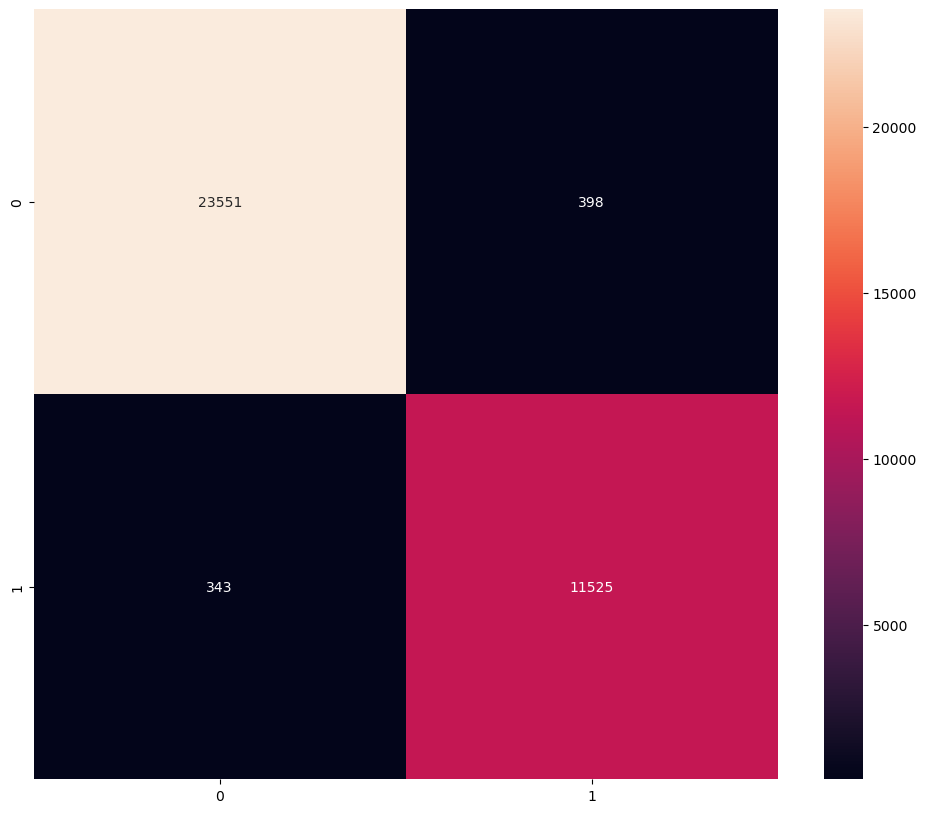

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(cm,annot=True,fmt='g')
plt.show()